### Cybersecurity Salary Analysis

![Cybersecurity](https://www.bbh.com/us/en/bbh-who-we-are/sustainable-bbh/cyber-security/_jcr_content/root/container/container/teaser.dnaimg.90.1440.jpeg/1620847754027/gettyimages-1194430863-sustainability-cybersecurity.jpeg)

As I pursue a job in the 2023 market ahead of graduating from my Master's degree in Data Science, I'm analyzing data on Cyber security roles and salaries in this space and to see where the most jobs for this industry are located based on historical data.

In [1]:
# Gathering the relevant libraries for my analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
from plotly.offline import init_notebook_mode
import plotly.express as px
import plotly.graph_objects as go
init_notebook_mode(connected = True)
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv("Cyber_Salary_Data.csv")

In [3]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2022,EN,FT,Cyber Program Manager,63000,USD,63000,US,50,US,S
1,2022,MI,FT,Security Analyst,95000,USD,95000,US,0,US,M
2,2022,MI,FT,Security Analyst,70000,USD,70000,US,0,US,M
3,2022,MI,FT,IT Security Analyst,250000,BRL,48853,BR,50,BR,L
4,2022,EN,CT,Cyber Security Analyst,120000,USD,120000,BW,100,BW,S


In [4]:
df.info

<bound method DataFrame.info of       work_year experience_level employment_type  \
0          2022               EN              FT   
1          2022               MI              FT   
2          2022               MI              FT   
3          2022               MI              FT   
4          2022               EN              CT   
...         ...              ...             ...   
1242       2020               MI              FT   
1243       2021               SE              FT   
1244       2021               SE              FT   
1245       2021               MI              FT   
1246       2021               MI              FT   

                         job_title  salary salary_currency  salary_in_usd  \
0            Cyber Program Manager   63000             USD          63000   
1                 Security Analyst   95000             USD          95000   
2                 Security Analyst   70000             USD          70000   
3              IT Security Analyst 

### Features of the Dataset

Note that there are 11 features to consider:
- Company size (company_size): this shows the average number of peple employed by the company during the year. S (small) corresponds to fewer than 50 employees. M (medium) corresponds to 50 to 250 employees. L (large) corresponds to greater than 250 employees.

- Company Location: There is a column in this dataset that shows the main office for the respective employer, or it shows the contracting branch that has a ISO 3166 country code. 

- remote_ratio: This represents the work that is done remotely. 100 — Fully remote corresponds to more than 80% of work done remotely, 50 - partially remote corresponds to a hybrid schedule, and 0 - no remote work corresponds to less than 20% remote working schedules.

- Salary: The gross compensation for the role

- Salary_currency: The currency in which the salary gets paid.

- salaryinusd: Thie corresponds to the payout in United States dollars

- employee_residence: Employee's primary country of residence during the fiscal year

- work_year: The year where a salary was paid to an employee.

- experience_level: The experience level for the particular role during the year with the following values: Entry-level (EN), Mid-level (MI), Senior-level (SE), and Executive-level.

- company_size: The average amount of people working at a company during the year: 
Large (L) more than 250 employees,
Medium (M) between 50 - 250 employees,
Small (S) less than 50 employees

In [5]:
df.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [6]:
df.dtypes

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

In [23]:
job_name = df.groupby('job_title').size().sort_values(ascending = False).head(20)
job_name
'''
The availability of jobs from most positions to least positions are displayed below.
This may suggest that Information Security Architects are more technical/important roles.
The sparsely populated roles may also be correlated with a higher accompanying salary.
'''

job_title
Security Engineer                     194
Cyber Security Analyst                133
Penetration Tester                     70
Information Security Manager           64
Cyber Security Engineer                63
Security Analyst                       47
Information Security Analyst           39
Cyber Security Specialist              31
Cyber Threat Intelligence Analyst      29
SOC Analyst                            28
Information Security Officer           28
Chief Information Security Officer     26
Cyber Security Architect               25
Application Security Engineer          24
DevSecOps Engineer                     22
Information Security Engineer          20
Incident Response Analyst              18
Security Specialist                    18
Information Security Specialist        17
Information Security Architect         16
dtype: int64

### Exploratory Data Analysis

In [7]:
# let's check for null values to see if imputation is needed 
# or to see if I should simply remove null values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [14]:
# let's take a cursory look at some of the basic statistics of the numerical variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
work_year,1247.0,2021.316760,7.155012e-01,2020.0,2021.0,2021.0,2022.0,2022.0
salary,1247.0,560852.488372,1.415944e+07,1740.0,79754.5,120000.0,160080.0,500000000.0
salary_in_usd,1247.0,120278.218925,7.029139e+04,2000.0,74594.5,110000.0,150000.0,910991.0
remote_ratio,1247.0,71.491580,3.934685e+01,0.0,50.0,100.0,100.0,100.0


In [9]:
df['experience_level'].replace({'EN': 'Entry-Level Role', 'MI': 'Mid-Level Role', 
                                'EX': 'Executive Level Role', 'SE': 'Senior Level Role'}, inplace = True)

In [10]:
df['employment_type'].replace({'PT': 'Part-Time Role', 'FT': 'Full Time Role', 'CT': 'Contract Role',
                               'FL': 'Freelance Role'}, inplace = True)

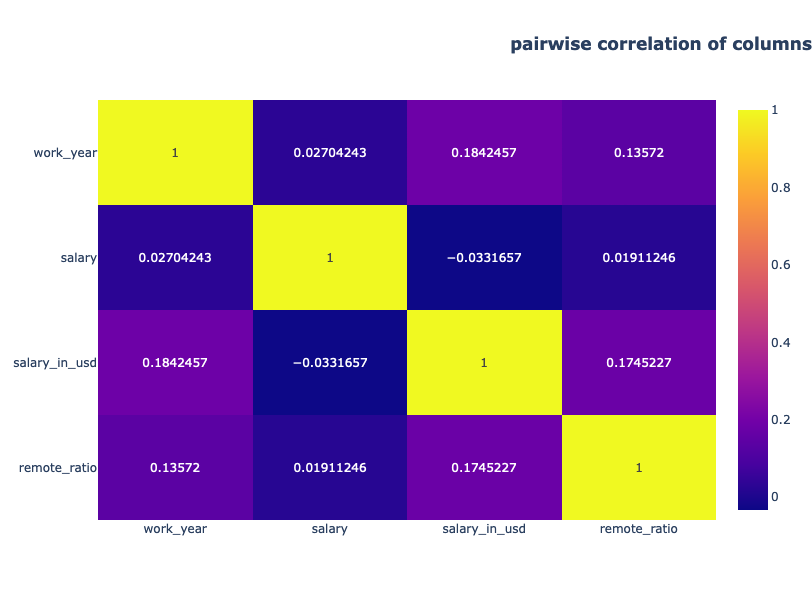

In [11]:
# evaluating Pearson correlation coefficient
fig = px.imshow(df.corr(method = 'pearson'), text_auto = True, height = 600, width = 600, template = 'plotly',
               aspect = 'auto', title = '<b>pairwise correlation of columns</b>')
fig.update_layout(title_x = 1)
fig.show()

'''
From these correlation coefficients we see that none of the variables are strongly correlated.
'''

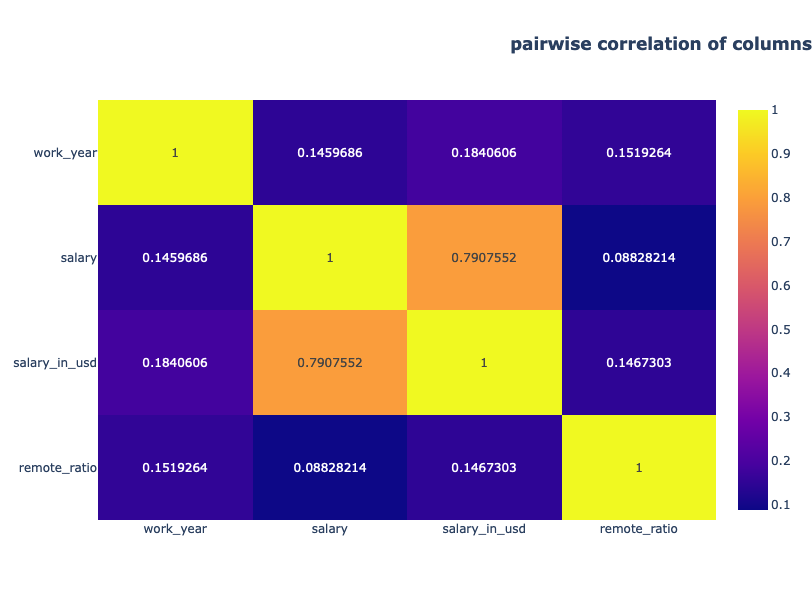

In [12]:
# evaluating Kendall correlation coefficient
fig = px.imshow(df.corr(method = 'kendall'), text_auto = True, height = 600, width = 600, template = 'plotly',
               aspect = 'auto', title = '<b>pairwise correlation of columns</b>')
fig.update_layout(title_x = 1)
fig.show()

'''
Note that Salary and Salary_in_usd features are positively correlated.
'''

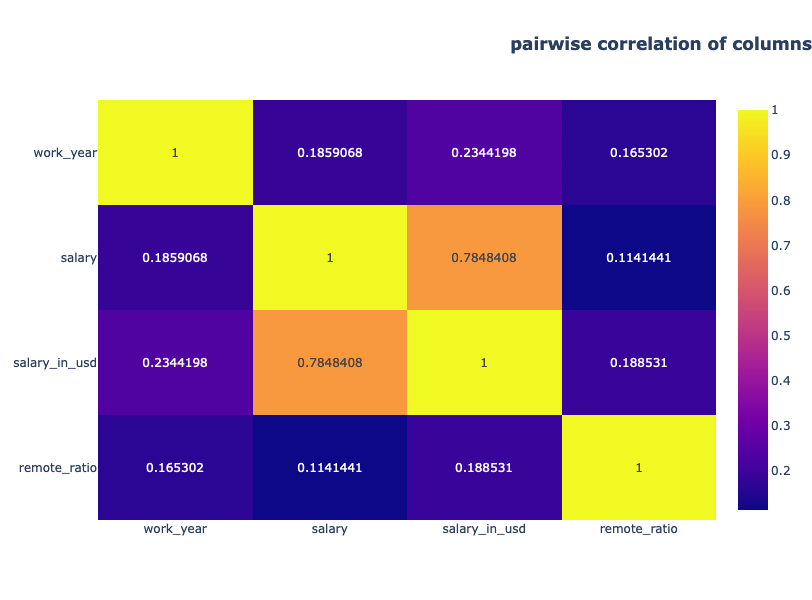

In [13]:
# evaluating Spearman correlation coefficient
fig = px.imshow(df.corr(method = 'spearman'), text_auto = True, height = 600, width = 600, template = 'plotly',
               aspect = 'auto', title = '<b>pairwise correlation of columns</b>')
fig.update_layout(title_x = 1)
fig.show()

'''
Note that Salary and Salary_in_usd features are positively correlated.
'''

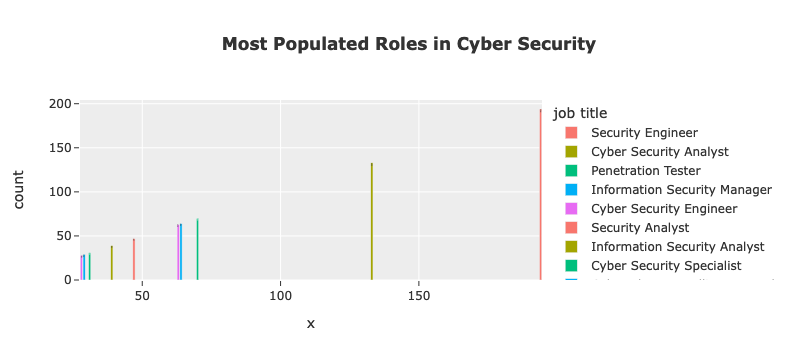

In [32]:
role_count = df['job_title'].value_counts().head(10)
fig = px.bar(role_count, x = role_count, y = role_count.values, color = role_count.index,
             text = role_count.values, labels = {'index': 'job title', 'y': 'count', 'text': 'count'}, 
             template = 'ggplot2', title = '<b> Most Populated Roles in Cyber Security')
fig.show()

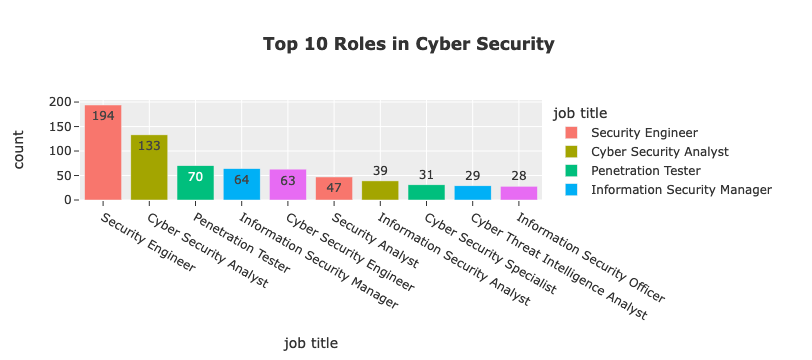

In [34]:
title = df['job_title'].value_counts().head(10)
fig=px.bar(title, x= title.index, y = title.values, color = title.index, text = title.values, labels={'index':'job title','y':'count','text':'count'},template='ggplot2',title='<b> Top 10 Roles in Cyber Security')
fig.show()

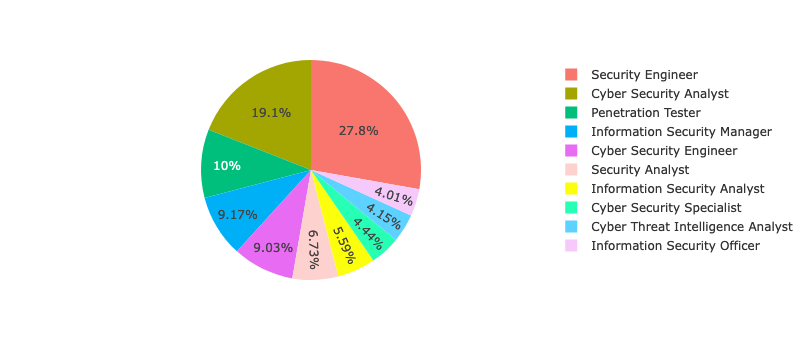

In [29]:
fig = px.pie(role_count, names = role_count.index, values = role_count.values, 
             labels = {'index': 'job_title', 'y': 'count', 'text': ' count'}, template = 'ggplot2')
fig.show()

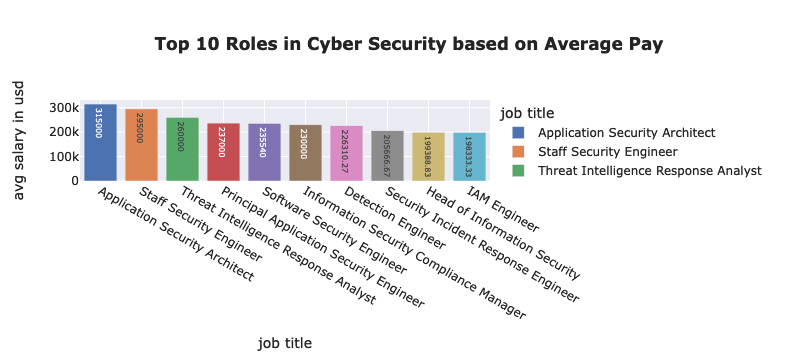

In [58]:
avg_pay = df.groupby('job_title', as_index = False)['salary_in_usd'].mean().sort_values(by = 'salary_in_usd', ascending = False)
avg_pay['salary_in_usd'] = round(avg_pay['salary_in_usd'], 2)
fig=px.bar(avg_pay.head(10),x='job_title',y='salary_in_usd', color = 'job_title', labels = {'job_title':'job title','salary_in_usd':'avg salary in usd'}, text = 'salary_in_usd', template = 'seaborn', title = '<b> Top 10 Roles in Cyber Security based on Average Pay')
fig.update_traces(textfont_size = 8)
fig.show()

### Which roles get highest compensation in USD?

In [39]:
sal_title = df.groupby(['job_title', 'salary_in_usd']).size().reset_index()

sal_title.head(15)
'''
The roles that aren't as highly compensated.
'''

,job_title,salary_in_usd,0
0,Application Security Analyst,50000,1
1,Application Security Analyst,54129,1
2,Application Security Analyst,56092,1
3,Application Security Analyst,259000,1
4,Application Security Architect,315000,1
5,Application Security Engineer,2000,1
6,Application Security Engineer,8223,1
7,Application Security Engineer,13523,1
8,Application Security Engineer,16228,1
9,Application Security Engineer,21637,1


In [42]:
sal_title.tail(15)

'''
The roles that are highly compensated.
'''

,job_title,salary_in_usd,0
1001,Threat Intelligence Analyst,189000,1
1002,Threat Intelligence Analyst,208000,1
1003,Threat Intelligence Response Analyst,220000,1
1004,Threat Intelligence Response Analyst,300000,1
1005,Vulnerability Analyst,80000,1
1006,Vulnerability Analyst,100000,1
1007,Vulnerability Analyst,115000,2
1008,Vulnerability Analyst,165000,1
1009,Vulnerability Management Engineer,69000,1
1010,Vulnerability Management Engineer,118100,1


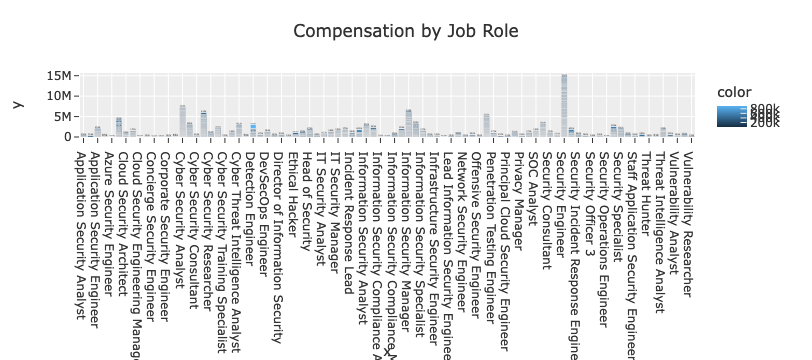

In [43]:
# All roles; the diagram isn't clear to read
fig = px.bar(x = sal_title["job_title"], y = sal_title["salary_in_usd"], text_auto = True,
             color = sal_title["salary_in_usd"], title = "Compensation by Job Role", template = 'ggplot2')
fig.show()

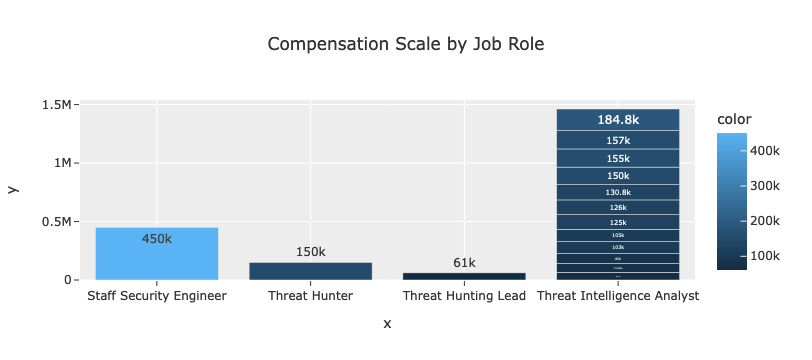

In [48]:
sal_title = sal_title[-15:]
fig = px.bar(x = sal_title["job_title"], y = sal_title["salary_in_usd"], text_auto = True,
             color = sal_title["salary_in_usd"], title = "Compensation Scale by Job Role", template = 'ggplot2')
fig.show()

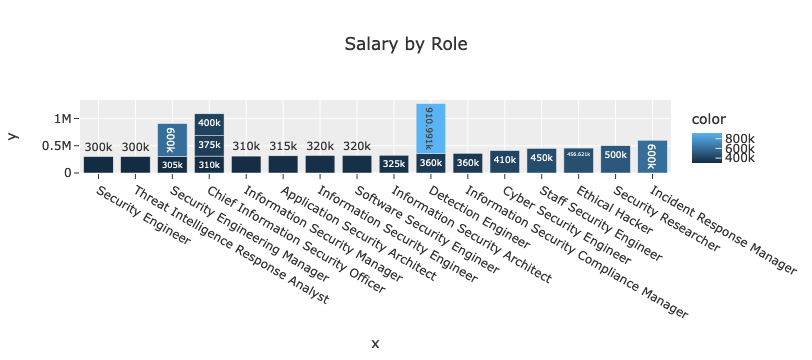

In [47]:
jobs = df.groupby(['salary_in_usd','job_title']).size().reset_index()
jobs = jobs[-20:]

fig = px.bar(x = jobs["job_title"], y = jobs["salary_in_usd"], text_auto=True, color = jobs["salary_in_usd"], title="Salary by Role", template='ggplot2')
fig.show()

In [49]:
job_exp = df.groupby('experience_level')["salary_in_usd"].mean().reset_index()
job_exp

,experience_level,salary_in_usd
0,Entry-Level Role,63579.474419
1,Executive Level Role,200706.082192
2,Mid-Level Role,103377.080097
3,Senior Level Role,144560.239488


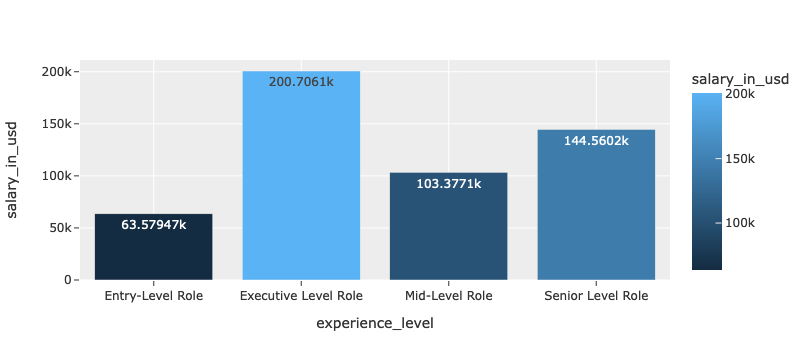

In [51]:
fig = px.bar(job_exp, x = "experience_level", y = "salary_in_usd", text_auto = True, color = "salary_in_usd", template = 'ggplot2')
fig.show()

**As one might expect, Executive and Senior roles get the highest compensation respectively.**

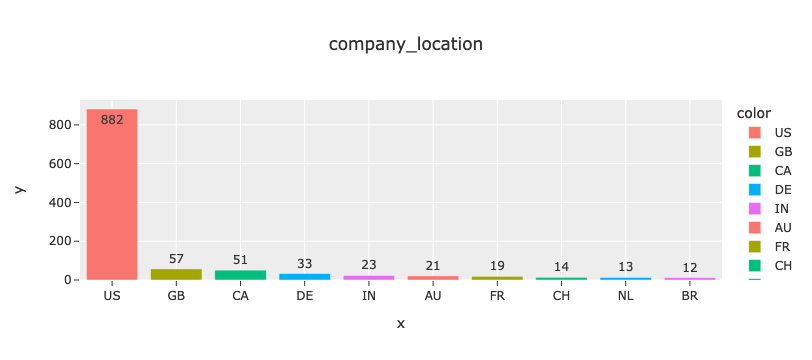

In [53]:
loc = df["company_location"].value_counts()[:10]

px.bar(y = loc.values, x = loc.index, text_auto = True, color = loc.index, template = 'ggplot2', title = "company_location")

**Here we see that the most jobs are based in the United States.**

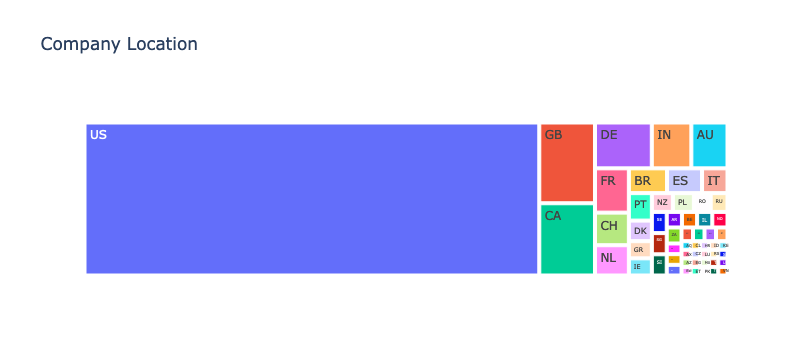

In [57]:
# Alternative visual representation
comp_location = px.treemap(df, path = ['company_location'], title = 'Company Location')
comp_location.show()

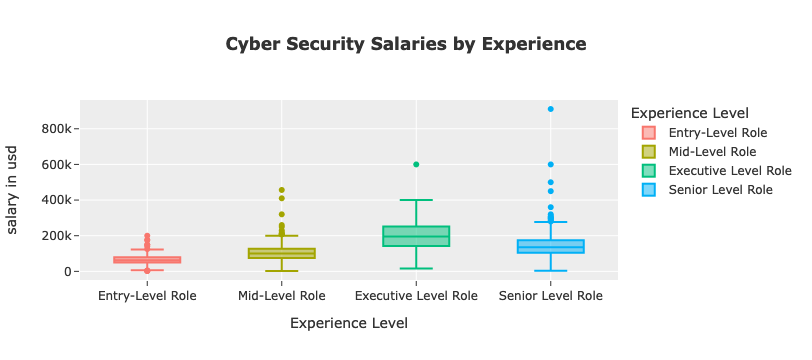

In [59]:
px.box(df, x = 'experience_level', y = 'salary_in_usd', color = 'experience_level',
       template = 'ggplot2', labels = {'experience_level':'Experience Level','salary_in_usd':'salary in usd'},
       title = '<b>Cyber Security Salaries by Experience')

In the end we see that the ideal place to apply for jobs is the United States where jobs are most readily available, and full time employees have higher earnings in the Cyber Security space. 

Further, employees with Executive and Senior roles have the highest earnings on average.